# konfigurasi

In [1]:
from google_play_scraper import app, reviews_all, Sort, permissions,reviews
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

In [3]:
result = app(
    'com.bca.mybca.omni.android',
    lang='en', # defaults to 'en'
    country='us' # defaults to 'us'
)
print(result)

{'title': 'myBCA', 'description': 'PT Bank Central Asia Tbk – Senantiasa di Sisi Anda.\r\n\r\nmyBCA hadir sebagai langkah awal BCA dalam menyediakan pengalaman perbankan yang lebih baik dan intuitif. Yuk, bersama mulai langkah awal ini dengan menikmati kemudahan myBCA.\r\n\r\n<b>✓ BCA ID</b>\r\nNikmati akses ke semua rekening dan produk perbankan. BCA ID memberikan kamu kebebasan untuk mengatur cara kamu bertransaksi.\r\n\r\n<b>✓ Solusi Lengkap</b>\r\nPenuhi kebutuhan hanya dalam satu sentuhan. myBCA mengintegrasikan produk perbankan dan service terbaik milik BCA, dan lebih!\r\n\r\n<b>✓ Mudah dan Aman</b>\r\nNikmati kemudahan dan kenyamanan myBCA, mengetahui transaksi Anda diproteksi dengan teknologi dan praktek terkemuka.\r\n\r\n<b>✓ Fleksibel</b>\r\nAkses myBCA dari manapun, sesuai dengan kebutuhan Anda. Dengan BCA ID yang sama, Anda dapat akses myBCA dari aplikasi ponsel, browser ponsel, dan browser komputer.\r\n\r\nNantikan berbagai fitur baru yang akan ditambah secara berkala semb

# Bisnis Understanding

# Data Undertanding

## Mengambil Data

In [2]:
import pandas as pd
from google_play_scraper import Sort, reviews
reviews_all_app = reviews_all(
    'com.bca.mybca.omni.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    filter_score_with=None # defaults to None (means all score))
)
# Mengubah data review menjadi DataFrame pandas
df_reviews_all = pd.DataFrame(reviews_all_app)


## df_reviews_all (data yang akan di anilisis)

In [3]:
df_reviews_all.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1f81d59d-9164-4afb-a090-72c87c186604,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bgus,5,0,1.23.1,2024-07-21 03:39:04,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-21 07:28:05,1.23.1
1,15cac69b-05e1-407d-a3ef-5c2fb8eb93cc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,rekomendasi,5,0,1.24.0,2024-07-21 01:38:57,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-21 03:00:24,1.24.0
2,704f572e-5577-48f0-8915-d8d65a6133f4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gatau kenapa BCA ID kena blokir , padahal ga m...",1,0,None,2024-07-20 23:19:07,"Mohon maaf atas kendala yang dialami, jika myB...",2024-07-21 02:59:33,None
3,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,1.24.0,2024-07-20 17:08:26,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-20 18:17:51,1.24.0
4,819dc85e-2820-43d5-ad11-10c1fd67098c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,1.24.0,2024-07-20 16:31:38,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-20 17:12:11,1.24.0


### Deskriptif Statistik

In [4]:
df_reviews_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12033 entries, 0 to 12032
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              12033 non-null  object        
 1   userName              12033 non-null  object        
 2   userImage             12033 non-null  object        
 3   content               12033 non-null  object        
 4   score                 12033 non-null  int64         
 5   thumbsUpCount         12033 non-null  int64         
 6   reviewCreatedVersion  9275 non-null   object        
 7   at                    12033 non-null  datetime64[ns]
 8   replyContent          12033 non-null  object        
 9   repliedAt             12033 non-null  datetime64[ns]
 10  appVersion            9275 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.0+ MB


In [5]:
df_reviews_all.describe()

,score,thumbsUpCount,at,repliedAt
count,12033.000000,12033.000000,12033,12033
mean,3.091581,1.802875,2023-05-31 11:54:40.152331008,2023-05-31 16:15:40.422338560
min,1.000000,0.000000,2021-05-03 14:55:26,2021-05-04 13:26:03
25%,1.000000,0.000000,2022-06-21 21:17:08,2022-06-22 01:35:47
50%,3.000000,0.000000,2023-10-31 00:05:36,2023-10-31 02:50:11
75%,5.000000,0.000000,2024-03-29 18:20:15,2024-03-30 01:39:35
max,5.000000,1422.000000,2024-07-21 03:39:04,2024-07-21 07:28:05
std,1.823109,18.354686,NaN,NaN


### Analisis Univariat

In [6]:
# Convert 'at' and 'repliedAt' to datetime
df_reviews_all['at'] = pd.to_datetime(df_reviews_all['at'])
df_reviews_all['repliedAt'] = pd.to_datetime(df_reviews_all['repliedAt'])

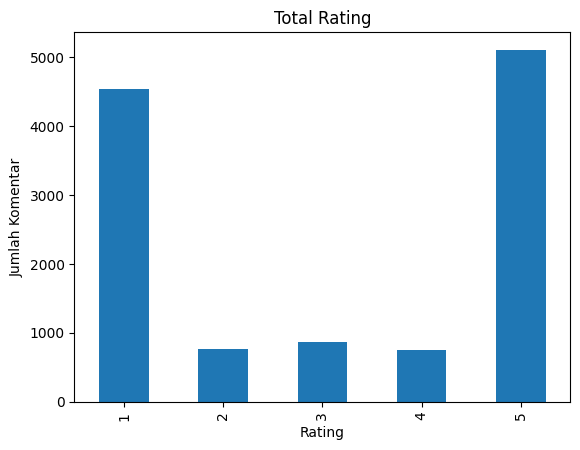

In [7]:
# @title total Score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_reviews_all is your DataFrame
# Ensure the score column is of type integer
df_reviews_all['score'] = df_reviews_all['score'].astype(int)

# Get the value counts and sort by index (score)
score_counts = df_reviews_all['score'].value_counts().sort_index()

# Plotting the bar chart
score_counts.plot(kind='bar')
plt.title('Total Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Komentar')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])  # Ensure x-ticks are labeled correctly
plt.show()


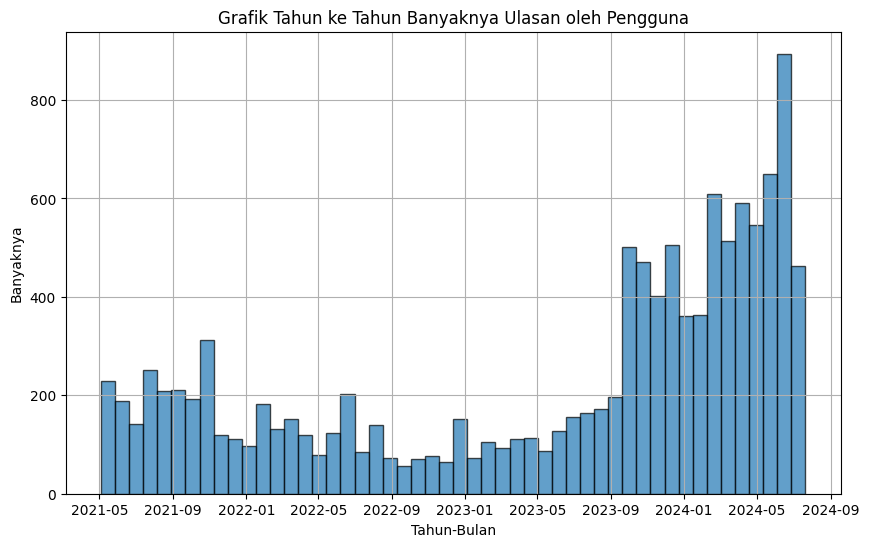

In [8]:
#@title Distribution of 'at' (review times)
plt.figure(figsize=(10, 6))
df_reviews_all['at'].hist(bins=50, edgecolor='k', alpha=0.7)
plt.title('Grafik Tahun ke Tahun Banyaknya Ulasan oleh Pengguna')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Banyaknya')
plt.grid(True)
plt.show()



### Analisis Multivariat
1. **Korelasi antara variabel numerik**: Score dan ThumbsUpCount.
2. **Distribusi Score menurut Versi Aplikasi**.
3. **Trend Ulasan dari Waktu ke Waktu**.


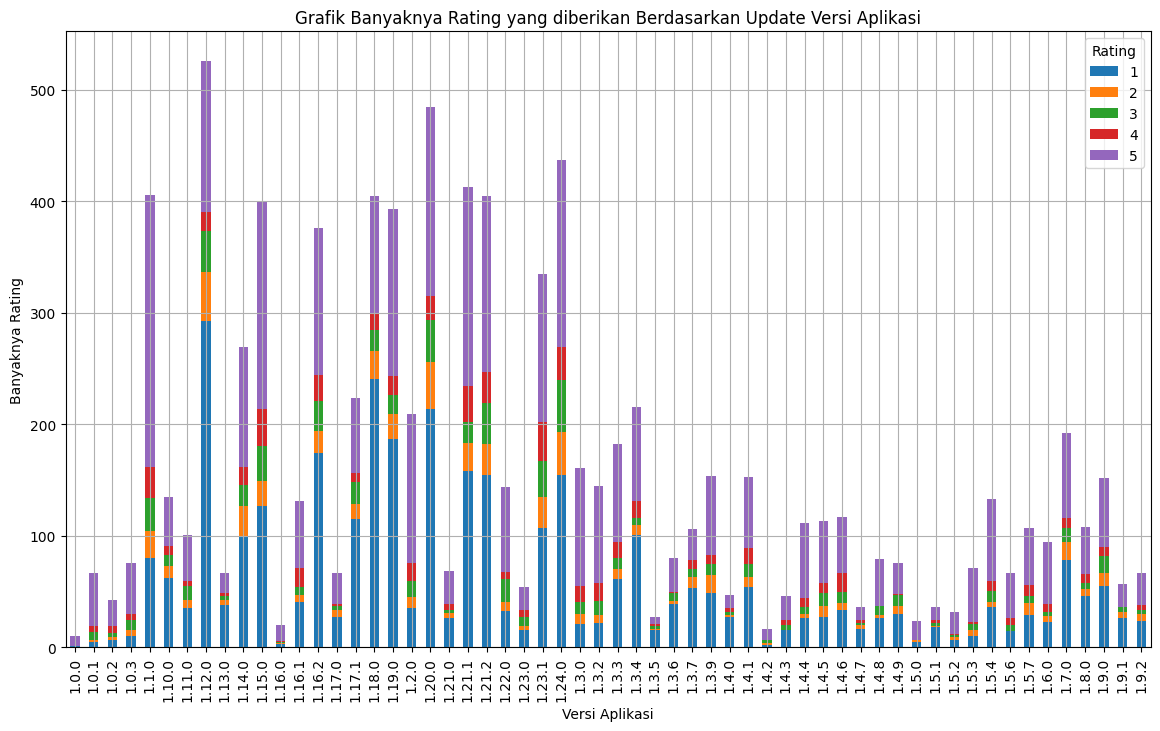

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# @title Distribusi Score menurut Versi Aplikasi
# Prepare the data
app_version_scores = df_reviews_all.groupby(['appVersion', 'score']).size().unstack().fillna(0)

# Plot the count plot using matplotlib
plt.figure(figsize=(14, 8))

# Create the bar plots
app_version_scores.plot(kind='bar', stacked=True, ax=plt.gca())

# Set the title and labels
plt.title('Grafik Banyaknya Rating yang diberikan Berdasarkan Update Versi Aplikasi')
plt.xlabel('Versi Aplikasi')
plt.ylabel('Banyaknya Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add legend and grid
plt.legend(title='Rating')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_22901/1703448791.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_reviews_all.set_index('at').resample('M').size().plot(marker='o')


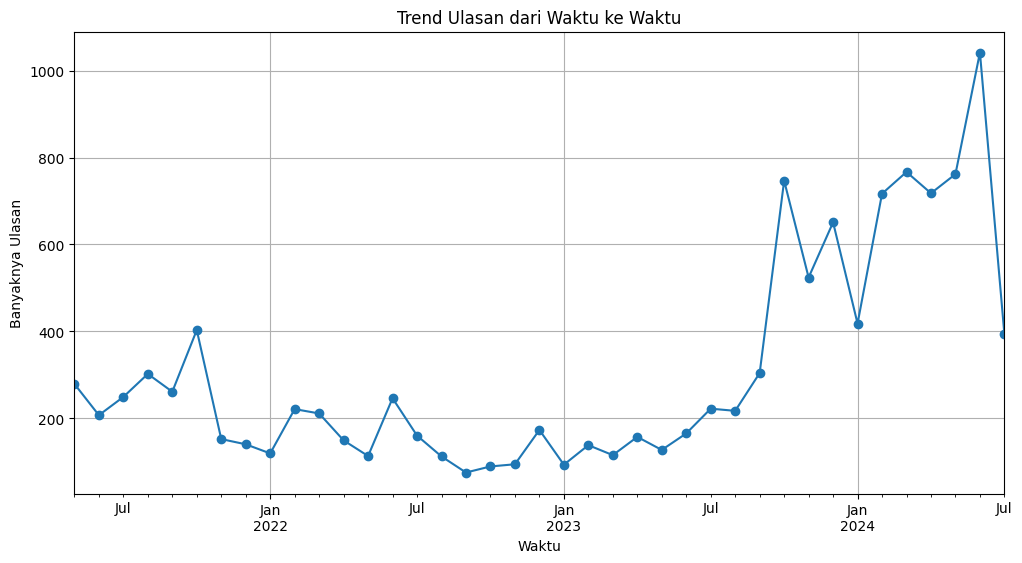

In [12]:
# @title Trend Ulasan dari Waktu ke Waktu
plt.figure(figsize=(12, 6))
df_reviews_all.set_index('at').resample('M').size().plot(marker='o')
plt.title('Trend Ulasan dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Banyaknya Ulasan')
plt.grid(True)
plt.show()

# **Data Preparation**

## Data Collection

In [13]:
df_reviews_all.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,cleaned_appVersion
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,1.24.0,2024-07-20 17:08:26,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-20 18:17:51,1.24.0,"[1, 24, 0]"
1,819dc85e-2820-43d5-ad11-10c1fd67098c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,1.24.0,2024-07-20 16:31:38,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-20 17:12:11,1.24.0,"[1, 24, 0]"


In [14]:
# @title drop Data
df_reviews_all_proses = df_reviews_all.copy()
df_reviews_all_proses.drop(columns=['userName','userImage','replyContent','repliedAt','reviewCreatedVersion','thumbsUpCount','replyContent','repliedAt','appVersion','at'], inplace=True)

In [15]:
# @title Mengubah lokasi fiture untuk memudahkan pengerjaan
df_reviews_all_proses = df_reviews_all_proses.loc[:, ['reviewId', 'score', 'content']]
df_reviews_all_proses.head(2)

,reviewId,score,content
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok


## Data Cleaning

### Case Folding

In [16]:
# @title mengubah data ke huruf kecil
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content'].str.lower()
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren!! alternatif saat mbca keblokir :)


In [17]:
# @title mengubah emot ke text

import re
import pandas as pd

emoji_dict = {
    "\U0001F600": "senang",  # Grinning Face
    "\U0001F601": "sangat senang",  # Grinning Face with Smiling Eyes
    "\U0001F602": "tertawa terbahak",  # Face with Tears of Joy
    "\U0001F603": "senang",  # Smiling Face with Open Mouth
    "\U0001F604": "sangat senang",  # Smiling Face with Open Mouth and Smiling Eyes
    "\U0001F605": "lega",  # Smiling Face with Open Mouth and Cold Sweat
    "\U0001F606": "tertawa lebar",  # Smiling Face with Open Mouth and Tightly Closed Eyes
    "\U0001F609": "menggoda",  # Winking Face
    "\U0001F60A": "bahagia",  # Smiling Face with Smiling Eyes
    "\U0001F60B": "nikmat",  # Face Savoring Delicious Food
    "\U0001F60C": "lega",  # Relieved Face
    "\U0001F60D": "jatuh cinta",  # Smiling Face with Heart-Eyes
    "\U0001F60E": "keren",  # Smiling Face with Sunglasses
    "\U0001F60F": "sinis",  # Smirking Face
    "\U0001F612": "takut",  # Unamused Face
    "\U0001F613": "keringat",  # Face with Cold Sweat
    "\U0001F614": "sedih",  # Pensive Face
    "\U0001F616": "sakit",  # Confounded Face
    "\U0001F618": "mencium",  # Face Throwing a Kiss
    "\U0001F621": "marah",  # Pouting Face
    "\U0001F622": "menangis",  # Crying Face
    "\U0001F623": "frustasi",  # Persevering Face
    "\U0001F624": "kesal",  # Face with Look of Triumph
    "\U0001F625": "cemas",  # Disappointed but Relieved Face
    "\U0001F628": "takut",  # Fearful Face
    "\U0001F629": "lelah",  # Weary Face
    "\U0001F62A": "mengantuk",  # Sleepy Face
    "\U0001F62B": "lelah",  # Tired Face
    "\U0001F62D": "sangat sedih",  # Loudly Crying Face
    "\U0001F630": "terkejut",  # Face with Open Mouth and Cold Sweat
    "\U0001F631": "ketakutan",  # Face Screaming in Fear
    "\U0001F632": "terkejut",  # Astonished Face
    "\U0001F633": "malu",  # Flushed Face
    "\U0001F635": "pingsan",  # Dizzy Face
    "\U0001F637": "sakit",  # Face with Medical Mask
    "\U0001F641": "sedih",  # Slightly Frowning Face
    "\U0001F642": "tersenyum",  # Slightly Smiling Face
    "\U0001F643": "terbalik",  # Upside-Down Face
    "\U0001F644": "melirik",  # Face with Rolling Eyes
    "\U0001F44D": "setuju",  # Thumbs Up
    "\U0001F44E": "tidak setuju",  # Thumbs Down
    "\U0001F44C": "ok",  # OK Hand
    "\U0001F44F": "tepuk tangan",  # Clapping Hands
    "\U0001F44A": "tinju",  # Fisted Hand Sign
    "\U0001F91E": "menyilang jari",  # Crossed Fingers
    "\U0001F64C": "angkat tangan",  # Raising Hands
    "\U0001F64F": "berdoa",
    "\U0001F97A":""# Folded Hands
}
def replace_emojis_with_meanings(text):
    def replace(match):
        emoji_char = match.group()
        emoji_meaning = emoji_dict.get(emoji_char, "")
        return f" {emoji_meaning} "

    # Pola untuk menemukan semua emotikon dalam teks
    emoji_pattern = re.compile("|".join(map(re.escape, emoji_dict.keys())))
    # Mengganti semua emotikon yang ditemukan dengan artinya
    text_with_meanings = emoji_pattern.sub(replace, text)

    # Menghapus emotikon yang tidak dikenal
    non_known_emoji_pattern = re.compile(r'[^\w\s,.?!]')
    text_cleaned = non_known_emoji_pattern.sub('', text_with_meanings)

    # Menghapus spasi tambahan yang mungkin muncul setelah penggantian
    return ' '.join(text_cleaned.split())

# Terapkan fungsi pengganti emoji
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(replace_emojis_with_meanings)


df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren!! alternatif saat mbca keblokir


In [18]:
# @title menghapus kode html , simbo simbol, urls
# hapus kode html
def remove_html_tags(text):
    clean_text = re.sub('<.*>', '', text)
    return clean_text

# hapus simbol smbol
def hapus_simbol(teks):
  return teks.translate(str.maketrans('', '', string.punctuation))

# hapus url
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    clean_text = re.sub(url_pattern, '', text)
    return clean_text

df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(remove_urls)
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(remove_html_tags)
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(hapus_simbol)

df_reviews_all_proses.head(20)

,reviewId,score,content,content_cleaning
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir
5,49bee2bd-b551-48e3-be57-af19437810e1,5,Jadi yang terbaik dalam hidupku tetap semangat,jadi yang terbaik dalam hidupku tetap semangat
6,6e264e1a-b781-40a0-b7ff-fd516291b887,1,"Sistemnya benerin lagi, saya udah bener masuki...",sistemnya benerin lagi saya udah bener masukin...
7,96c135af-539d-4d0f-89ed-c0961d929ee5,1,"Sy kasi bintang satu sja, kenapa saldo ku sell...",sy kasi bintang satu sja kenapa saldo ku sellu...
8,9a016324-a32f-4ed4-bdef-441a0d745a98,1,"2x bikin laporan masalah qris, kirain mah baka...",2x bikin laporan masalah qris kirain mah bakal...
9,e82c878c-3ea9-44e3-b000-e0875b5627d9,5,so far o good,so far o good


In [19]:
import pandas as pd
import re

# Definisikan fungsi untuk mengonversi angka ke huruf
def angka_ke_huruf(angka):
    satuan = ["", "satu", "dua", "tiga", "empat", "lima", "enam", "tujuh", "delapan", "sembilan", "sepuluh", "sebelas"]

    if angka < 12:
        return satuan[angka]
    elif angka < 20:
        return satuan[angka - 10] + " belas"
    elif angka < 100:
        return satuan[angka // 10] + " puluh" + (" " + satuan[angka % 10] if (angka % 10 != 0) else "")
    elif angka < 200:
        return "seratus" + (" " + angka_ke_huruf(angka - 100) if (angka > 100) else "")
    elif angka < 1000:
        return satuan[angka // 100] + " ratus" + (" " + angka_ke_huruf(angka % 100) if (angka % 100 != 0) else "")
    elif angka < 2000:
        return "seribu" + (" " + angka_ke_huruf(angka - 1000) if (angka > 1000) else "")
    elif angka < 1000000:
        return angka_ke_huruf(angka // 1000) + " ribu" + (" " + angka_ke_huruf(angka % 1000) if (angka % 1000 != 0) else "")
    elif angka < 1000000000:
        return angka_ke_huruf(angka // 1000000) + " juta" + (" " + angka_ke_huruf(angka % 1000000) if (angka % 1000000 != 0) else "")
    else:
        return "Angka terlalu besar"

# Definisikan fungsi untuk mengonversi angka dalam teks menjadi huruf tanpa memperhatikan satuan
def remove_pattern(text):
    def ganti_angka(match):
        angka_str = match.group(0)
        angka = int(re.sub(r'\D', '', angka_str))  # Menghapus karakter non-digit
        return angka_ke_huruf(angka)

    return re.sub(r'\b\d+\b', ganti_angka, text)

# Terapkan fungsi pada kolom 'content_cleaning'
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(remove_pattern)
df_reviews_all_proses.head(5)


,reviewId,score,content,content_cleaning
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir


## Text Preprocessing

### Normalisasi Kata

In [20]:
#@title membuat kamus sendiri berdasarkan ulasan
from collections import Counter
import pandas as pd

text = " ".join(df_reviews_all_proses['content_cleaning'])
tokens = text.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(tokens)

# Mengambil kata dengan frekuensi kemunculan tertinggi
top_words = word_counts.most_common(25000)

word, count = zip(*top_words)
data_kata = pd.DataFrame({'kata': word,'count':count})
data_kata.head()

,kata,count
0,bca,3142
1,di,2811
2,bisa,2638
3,aplikasi,2228
4,dan,2093


In [21]:
#@title menerapkan kamus yang telah dibuat
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca kamus kata tidak baku
kamus_data = pd.read_excel("https://github.com/nsyamsu23/kamus/raw/main/kamuskatabaku.xlsx")
kamus_tidak_baku = pd.Series(kamus_data["kata_baku"],index=kamus_data["tidak_baku"]).to_dict()


# Aplikasikan fungsi replace_taboo_words pada kolom content_cleaning
df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)[0])
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis dan komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif saat mbca keblokir


In [22]:
# @title kata yang disingkat diperpanjang dan slangword
import pandas as pd

chat_words_mapping = {
    "@": "di",
    "dagurung": "dari gurung",
    "abis": "habis",
    "ad": "ada",
    "adlh": "adalah",
    "afaik": "as far as i know",
    "ahaha": "haha",
    "aj": "saja",
    "ajep-ajep": "dunia gemerlap",
    "ak": "saya",
    "akika": "aku",
    "akkoh": "aku",
    "akuwh": "aku",
    "alay": "norak",
    "alow": "halo",
    "ambilin": "ambilkan",
    "ancur": "hancur",
    "anjrit": "anjing",
    "anter": "antar",
    "ap2": "apa-apa",
    "apasih": "apa sih",
    "apes": "sial",
    "aps": "apa",
    "aq": "saya",
    "aquwh": "aku",
    "asbun": "asal bunyi",
    "aseekk": "asyik",
    "asekk": "asyik",
    "asem": "asam",
    "aspal": "asli tetapi palsu",
    "astul": "asal tulis",
    "ato": "atau",
    "au ah": "tidak mau tahu",
    "awak": "saya",
    "ay": "sayang",
    "ayank": "sayang",
    "b4": "sebelum",
    "bakalan": "akan",
    "bandes": "bantuan desa",
    "bangedh": "banget",
    "banpol": "bantuan polisi",
    "banpur": "bantuan tempur",
    "basbang": "basi",
    "bcanda": "bercanda",
    "bdg": "bandung",
    "begajulan": "nakal",
    "beliin": "belikan",
    "bencong": "banci",
    "bentar": "sebentar",
    "ber3": "bertiga",
    "beresin": "membereskan",
    "bete": "bosan",
    "beud": "banget",
    "bg": "abang",
    "bgmn": "bagaimana",
    "bgt": "banget",
    "bijimane": "bagaimana",
    "bintal": "bimbingan mental",
    "bkl": "akan",
    "bknnya": "bukannya",
    "blegug": "bodoh",
    "blh": "boleh",
    "bln": "bulan",
    "blum": "belum",
    "bnci": "benci",
    "bnran": "yang benar",
    "bodor": "lucu",
    "bokap": "ayah",
    "boker": "buang air besar",
    "bokis": "bohong",
    "boljug": "boleh juga",
    "bonek": "bocah nekat",
    "boyeh": "boleh",
    "br": "baru",
    "brg": "bareng",
    "bro": "saudara laki-laki",
    "bru": "baru",
    "bs": "bisa",
    "bsen": "bosan",
    "bt": "buat",
    "btw": "ngomong-ngomong",
    "buaya": "tidak setia",
    "bubbu": "tidur",
    "bubu": "tidur",
    "bumil": "ibu hamil",
    "bw": "bawa",
    "bwt": "buat",
    "byk": "banyak",
    "byrin": "bayarkan",
    "cabal": "sabar",
    "cadas": "keren",
    "calo": "makelar",
    "can": "belum",
    "capcus": "pergi",
    "caper": "cari perhatian",
    "ce": "cewek",
    "cekal": "cegah tangkal",
    "cemen": "penakut",
    "cengengesan": "tertawa",
    "cepet": "cepat",
    "cew": "cewek",
    "chuyunk": "sayang",
    "cimeng": "ganja",
    "cipika cipiki": "cium pipi kanan cium pipi kiri",
    "ciyh": "sih",
    "ckepp": "cakep",
    "ckp": "cakep",
    "cmiiw": "correct me if i'm wrong",
    "cmpur": "campur",
    "cong": "banci",
    "conlok": "cinta lokasi",
    "cowwyy": "maaf",
    "cp": "siapa",
    "cpe": "capek",
    "cppe": "capek",
    "cucok": "cocok",
    "cuex": "cuek",
    "cumi": "Cuma miscall",
    "cups": "culun",
    "curanmor": "pencurian kendaraan bermotor",
    "curcol": "curahan hati colongan",
    "cwek": "cewek",
    "cyin": "cinta",
    "d": "di",
    "dah": "deh",
    "dapet": "dapat",
    "de": "adik",
    "dek": "adik",
    "demen": "suka",
    "deyh": "deh",
    "dgn": "dengan",
    "diancurin": "dihancurkan",
    "dimaafin": "dimaafkan",
    "dimintak": "diminta",
    "disono": "di sana",
    "dket": "dekat",
    "dkk": "dan kawan-kawan",
    "dll": "dan lain-lain",
    "dlu": "dulu",
    "dngn": "dengan",
    "dodol": "bodoh",
    "doku": "uang",
    "dongs": "dong",
    "dpt": "dapat",
    "dri": "dari",
    "drmn": "darimana",
    "drtd": "dari tadi",
    "dst": "dan seterusnya",
    "dtg": "datang",
    "duh": "aduh",
    "duren": "durian",
    "ed": "edisi",
    "egp": "emang gue pikirin",
    "eke": "aku",
    "elu": "kamu",
    "emangnya": "memangnya",
    "emng": "memang",
    "endak": "tidak",
    "enggak": "tidak",
    "envy": "iri",
    "ex": "mantan",
    "fax": "facsimile",
    "fifo": "first in first out",
    "folbek": "follow back",
    "fyi": "sebagai informasi",
    "gaada": "tidak ada uang",
    "gag": "tidak",
    "gaje": "tidak jelas",
    "gak papa": "tidak apa-apa",
    "gan": "juragan",
    "gaptek": "gagap teknologi",
    "gatek": "gagap teknologi",
    "gawe": "kerja",
    "gbs": "tidak bisa",
    "gebetan": "orang yang disuka",
    "geje": "tidak jelas",
    "gepeng": "gelandangan dan pengemis",
    "ghiy": "lagi",
    "gile": "gila",
    "gimana": "bagaimana",
    "gino": "gigi nongol",
    "githu": "gitu",
    "gj": "tidak jelas",
    "gmana": "bagaimana",
    "gn": "begini",
    "goblok": "bodoh",
    "golput": "golongan putih",
    "gowes": "mengayuh sepeda",
    "gpny": "tidak punya",
    "gr": "gede rasa",
    "gretongan": "gratisan",
    "gtau": "tidak tahu",
    "gua": "saya",
    "guoblok": "goblok",
    "gw": "saya",
    "ha": "tertawa",
    "haha": "tertawa",
    "hallow": "halo",
    "hankam": "pertahanan dan keamanan",
    "hehe": "he",
    "helo": "halo",
    "hey": "hai",
    "hlm": "halaman",
    "hny": "hanya",
    "hoax": "isu bohong",
    "hr": "hari",
    "hrus": "harus",
    "hubdar": "perhubungan darat",
    "huff": "mengeluh",
    "hum": "rumah",
    "humz": "rumah",
    "ilang": "hilang",
    "ilfil": "tidak suka",
    "imho": "in my humble opinion",
    "imoetz": "imut",
    "item": "hitam",
    "itungan": "hitungan",
    "iye": "iya",
    "ja": "saja",
    "jadiin": "jadi",
    "jaim": "jaga image",
    "jayus": "tidak lucu",
    "jdi": "jadi",
    "jem": "jam",
    "jga": "juga",
    "jgnkan": "jangankan",
    "jir": "anjing",
    "jln": "jalan",
    "jomblo": "tidak punya pacar",
    "jubir": "juru bicara",
    "jutek": "galak",
    "k": "ke",
    "kab": "kabupaten",
    "kabor": "kabur",
    "kacrut": "kacau",
    "kadiv": "kepala divisi",
    "kagak": "tidak",
    "kalo": "kalau",
    "kampret": "sialan",
    "kamtibmas": "keamanan dan ketertiban masyarakat",
    "kamuwh": "kamu",
    "kanwil": "kantor wilayah",
    "karna": "karena",
    "kasubbag": "kepala subbagian",
    "katrok": "kampungan",
    "kayanya": "kayaknya",
    "kbr": "kabar",
    "kdu": "harus",
    "kec": "kecamatan",
    "kejurnas": "kejuaraan nasional",
    "kekeuh": "keras kepala",
    "kel": "kelurahan",
    "kemaren": "kemarin",
    "kepengen": "mau",
    "kepingin": "mau",
    "kepsek": "kepala sekolah",
    "kesbang": "kesatuan bangsa",
    "kesra": "kesejahteraan rakyat",
    "ketrima": "diterima",
    "kgiatan": "kegiatan",
    "kibul": "bohong",
    "kimpoi": "kawin",
    "kl": "kalau",
    "klianz": "kalian",
    "kloter": "kelompok terbang",
    "klw": "kalau",
    "km": "kamu",
    "kmps": "kampus",
    "kmrn": "kemarin",
    "knal": "kenal",
    "knp": "kenapa",
    "kodya": "kota madya",
    "komdis": "komisi disiplin",
    "komsov": "komunis sovyet",
    "kongkow": "kumpul bareng teman-teman",
    "kopdar": "kopi darat",
    "korup": "korupsi",
    "kpn": "kapan",
    "krenz": "keren",
    "krm": "kirim",
    "kt": "kita",
    "ktmu": "ketemu",
    "ktr": "kantor",
    "kuper": "kurang pergaulan",
    "kw": "imitasi",
    "kyk": "seperti",
    "la": "lah",
    "lam": "salam",
    "lamp": "lampiran",
    "lanud": "landasan udara",
    "latgab": "latihan gabungan",
    "lebay": "berlebihan",
    "leh": "boleh",
    "lelet": "lambat",
    "lemot": "lambat",
    "lgi": "lagi",
    "lgsg": "langsung",
    "liat": "lihat",
    "litbang": "penelitian dan pengembangan",
    "lmyn": "lumayan",
    "lo": "kamu",
    "loe": "kamu",
    "lola": "lambat berfikir",
    "louph": "cinta",
    "low": "kalau",
    "lp": "lupa",
    "luber": "langsung, umum, bebas, dan rahasia",
    "luchuw": "lucu",
    "lum": "belum",
    "luthu": "lucu",
    "lwn": "lawan",
    "maacih": "terima kasih",
    "mabal": "bolos",
    "macem": "macam",
    "macih": "masih",
    "maem": "makan",
    "magabut": "makan gaji buta",
    "maho": "homo",
    "mak jang": "kaget",
    "maksain": "memaksa",
    "malem": "malam",
    "mam": "makan",
    "maneh": "kamu",
    "maniez": "manis",
    "mao": "mau",
    "masukin": "masukkan",
    "melu": "ikut",
    "mepet": "dekat sekali",
    "mgu": "minggu",
    "migas": "minyak dan gas bumi",
    "mikol": "minuman beralkohol",
    "miras": "minuman keras",
    "mlah": "malah",
    "mngkn": "mungkin",
    "mo": "mau",
    "mokad": "mati",
    "moso": "masa",
    "mpe": "sampai",
    "msk": "masuk",
    "mslh": "masalah",
    "mt": "makan teman",
    "mubes": "musyawarah besar",
    "mulu": "melulu",
    "mumpung": "selagi",
    "munas": "musyawarah nasional",
    "muntaber": "muntah dan berak",
    "musti": "mesti",
    "muupz": "maaf",
    "mw": "mau",
    "n": "dan",
    "nanam": "menanam",
    "nanya": "bertanya",
    "napa": "kenapa",
    "napi": "narapidana",
    "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ",
    "narkoba": "narkotika, psikotropika, dan obat terlarang",
    "nasgor": "nasi goreng",
    "nda": "tidak",
    "ndiri": "sendiri",
    "ne": "ini",
    "nekolin": "neokolonialisme",
    "nembak": "menyatakan cinta",
    "ngabuburit": "menunggu berbuka puasa",
    "ngaku": "mengaku",
    "ngambil": "mengambil",
    "nganggur": "tidak punya pekerjaan",
    "ngapah": "kenapa",
    "ngaret": "terlambat",
    "ngasih": "memberikan",
    "ngebandel": "berbuat bandel",
    "ngegosip": "bergosip",
    "ngeklaim": "mengklaim",
    "ngeksis": "menjadi eksis",
    "ngeles": "berkilah",
    "ngelidur": "menggigau",
    "ngerampok": "merampok",
    "ngga": "tidak",
    "ngibul": "berbohong",
    "ngiler": "mau",
    "ngiri": "iri",
    "ngisiin": "mengisikan",
    "ngmng": "bicara",
    "ngomong": "bicara",
    "ngubek2": "mencari-cari",
    "ngurus": "mengurus",
    "nie": "ini",
    "nih": "ini",
    "niyh": "nih",
    "nmr": "nomor",
    "nntn": "nonton",
    "nobar": "nonton bareng",
    "np": "now playing",
    "ntar": "nanti",
    "ntn": "nonton",
    "numpuk": "bertumpuk",
    "nutupin": "menutupi",
    "nyari": "mencari",
    "nyekar": "menyekar",
    "nyicil": "mencicil",
    "nyoblos": "mencoblos",
    "nyokap": "ibu",
    "ogah": "tidak mau",
    "ol": "online",
    "ongkir": "ongkos kirim",
    "oot": "out of topic",
    "org2": "orang-orang",
    "ortu": "orang tua",
    "otda": "otonomi daerah",
    "otw": "on the way, sedang di jalan",
    "pacal": "pacar",
    "pake": "pakai",
    "pala": "kepala",
    "pansus": "panitia khusus",
    "parpol": "partai politik",
    "pasutri": "pasangan suami istri",
    "pd": "pada",
    "pede": "percaya diri",
    "pelatnas": "pemusatan latihan nasional",
    "pemda": "pemerintah daerah",
    "pemkot": "pemerintah kota",
    "pemred": "pemimpin redaksi",
    "penjas": "pendidikan jasmani",
    "perda": "peraturan daerah",
    "perhatiin": "perhatikan",
    "pesenan": "pesanan",
    "pgang": "pegang",
    "pi": "tapi",
    "pilkada": "pemilihan kepala daerah",
    "pisan": "sangat",
    "pk": "pak",
    "plg": "paling",
    "pmrnth": "pemerintah",
    "polantas": "polisi lalu lintas",
    "ponpes": "pondok pesantren",
    "pp": "pulang pergi",
    "prg": "pergi",
    "prnh": "pernah",
    "psen": "pesan",
    "pst": "pasti",
    "pswt": "pesawat",
    "pw": "posisi nyaman",
    "qmu": "kamu",
    "rakor": "rapat koordinasi",
    "ranmor": "kendaraan bermotor",
    "re": "reply",
    "ref": "referensi",
    "rehab": "rehabilitasi",
    "rempong": "sulit",
    "repp": "balas",
    "restik": "reserse narkotika",
    "rhs": "rahasia",
    "rmh": "rumah",
    "ru": "baru",
    "ruko": "rumah toko",
    "rusunawa": "rumah susun sewa",
    "ruz": "terus",
    "saia": "saya",
    "salting": "salah tingkah",
    "sampe": "sampai",
    "samsek": "sama sekali",
    "sapose": "siapa",
    "satpam": "satuan pengamanan",
    "sbb": "sebagai berikut",
    "sbh": "sebuah",
    "sbnrny": "sebenarnya",
    "scr": "secara",
    "sdgkn": "sedangkan",
    "sdkt": "sedikit",
    "se7": "setuju",
    "sebelas dua belas": "mirip",
    "sembako": "sembilan bahan pokok",
    "sempet": "sempat",
    "sendratari": "seni drama tari",
    "sgt": "sangat",
    "shg": "sehingga",
    "siech": "sih",
    "sikon": "situasi dan kondisi",
    "sinetron": "sinema elektronik",
    "siramin": "siramkan",
    "sj": "saja",
    "skalian": "sekalian",
    "sklh": "sekolah",
    "skt": "sakit",
    "slesai": "selesai",
    "sll": "selalu",
    "slma": "selama",
    "slsai": "selesai",
    "smpt": "sempat",
    "smw": "semua",
    "sndiri": "sendiri",
    "soljum": "sholat jumat",
    "songong": "sombong",
    "sory": "maaf",
    "sosek": "sosial-ekonomi",
    "sotoy": "sok tahu",
    "spa": "siapa",
    "sppa": "siapa",
    "spt": "seperti",
    "srtfkt": "sertifikat",
    "stiap": "setiap",
    "stlh": "setelah",
    "suk": "masuk",
    "sumpek": "sempit",
    "syg": "sayang",
    "t4": "tempat",
    "tajir": "kaya",
    "tau": "tahu",
    "taw": "tahu",
    "td": "tadi",
    "tdk": "tidak",
    "teh": "kakak perempuan",
    "telat": "terlambat",
    "telmi": "telat berpikir",
    "temen": "teman",
    "tengil": "menyebalkan",
    "tepar": "terkapar",
    "tggu": "tunggu",
    "tgu": "tunggu",
    "thankz": "terima kasih",
    "thn": "tahun",
    "tilang": "bukti pelanggaran",
    "tipiwan": "TvOne",
    "tks": "terima kasih",
    "tlp": "telepon",
    "tls": "tulis",
    "tmbah": "tambah",
    "tmen2": "teman-teman",
    "tmpah": "tumpah",
    "tmpt": "tempat",
    "tngu": "tunggu",
    "tnyta": "ternyata",
    "tokai": "tai",
    "toserba": "toko serba ada",
    "tpi": "tapi",
    "trdhulu": "terdahulu",
    "trima": "terima kasih",
    "trm": "terima",
    "trs": "terus",
    "trutama": "terutama",
    "ts": "penulis",
    "tst": "tahu sama tahu",
    "ttg": "tentang",
    "tuch": "tuh",
    "tuir": "tua",
    "tw": "tahu",
    "u": "kamu",
    "ud": "sudah",
    "udah": "sudah",
    "ujg": "ujung",
    "ul": "ulangan",
    "unyu": "lucu",
    "uplot": "unggah",
    "urang": "saya",
    "usah": "perlu",
    "utk": "untuk",
    "valas": "valuta asing",
    "w/": "dengan",
    "wadir": "wakil direktur",
    "wamil": "wajib militer",
}

# Fungsi untuk memperluas kata-kata chat
def expand_chat_words(text, chat_words_mapping):
    words = text.split()
    expanded_words = [chat_words_mapping[word] if word in chat_words_mapping else word for word in words]
    return ' '.join(expanded_words)

# Normalisasi kata
df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning_normalized'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)[0])

# Aplikasikan fungsi expand_chat_words pada kolom content_cleaning_normalized
df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning_normalized'].apply(lambda x: expand_chat_words(x, chat_words_mapping))

df_reviews_all_proses.head()


,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis dan komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif saat mbca keblokir


In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
indonesia_s = stopwords.words('indonesian')

from nlp_id.stopword import StopWord
stopword_nlp_id = StopWord()
stopword_nlp_id.get_stopword()
indonesia_nlp_id = stopword_nlp_id.get_stopword()
print(len(indonesia_s), "nltk -> stopwords bahasa indonesia:", indonesia_s)
print(len(indonesia_nlp_id), "nlp_id -> stopwords bahasa indonesia:", indonesia_nlp_id)

758 nltk -> stopwords bahasa indonesia: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/python/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# @title menghapus kata henti dan kata yang tidak bermakna
def remove_stop_words_nltk(text):
    stop_words = stopwords.words('indonesian')
    stop_words.extend([
        "mybca","my","bca"
    ])
    stop_words = set(stop_words)
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
def remove_stop_words_nlp_id(text):
    rm_stopword = remove_stop_words_nltk(text)
    return stopword_nlp_id.remove_stopword(rm_stopword)

df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning_normalized'].apply(remove_stop_words_nlp_id)

df_reviews_all_proses.head(5)


,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir


In [25]:
df_reviews_all_proses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   reviewId                     12032 non-null  object
 1   score                        12032 non-null  int64 
 2   content                      12032 non-null  object
 3   content_cleaning             12032 non-null  object
 4   content_cleaning_normalized  12032 non-null  object
dtypes: int64(1), object(4)
memory usage: 470.1+ KB


In [26]:
#@title drop yang kosong di content_cleaning_normalized

df_reviews_all_proses = df_reviews_all_proses.dropna(subset=['content_cleaning_normalized'])
df_reviews_all_proses = df_reviews_all_proses[(df_reviews_all_proses['content_cleaning_normalized'].str.len() > 0) ]
df_reviews_all_proses = df_reviews_all_proses.reset_index(drop=True)
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir


### Tokenizing

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
#@title memberikan token setiap kata

from nlp_id.tokenizer import Tokenizer
tokenizer = Tokenizer()

def tokenizing_words(text):
    tokens = tokenizer.tokenize(remove_stop_words_nlp_id(text))
    return tokens

df_reviews_all_proses['content_tokenizing']  = df_reviews_all_proses['content_cleaning_normalized'] .apply(tokenizing_words)
df_reviews_all_proses.head(20)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok,[ok]
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok,[ok]
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit,"[praktis, komplit]"
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan,"[bagus, dach, tahapan]"
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir,"[keren, alternatif, mbca, keblokir]"
5,49bee2bd-b551-48e3-be57-af19437810e1,5,Jadi yang terbaik dalam hidupku tetap semangat,jadi yang terbaik dalam hidupku tetap semangat,terbaik hidupku semangat,"[terbaik, hidup, ku, semangat]"
6,6e264e1a-b781-40a0-b7ff-fd516291b887,1,"Sistemnya benerin lagi, saya udah bener masuki...",sistemnya benerin lagi saya udah bener masukin...,sistemnya benerin id password idpassword salah...,"[sistem, nya, benerin, id, password, idpasswor..."
7,96c135af-539d-4d0f-89ed-c0961d929ee5,1,"Sy kasi bintang satu sja, kenapa saldo ku sell...",sy kasi bintang satu sja kenapa saldo ku sellu...,bintang saldo ku sellu berkurang sepuluh ribu ...,"[bintang, saldo, ku, sellu, berkurang, sepuluh..."
8,9a016324-a32f-4ed4-bdef-441a0d745a98,1,"2x bikin laporan masalah qris, kirain mah baka...",2x bikin laporan masalah qris kirain mah bakal...,2x bikin laporan qris uangnya hasilnya aneh na...,"[2x, bikin, laporan, qris, uang, nya, hasil, n..."
9,e82c878c-3ea9-44e3-b000-e0875b5627d9,5,so far o good,so far o good,far o good,"[far, o, good]"


### Part Of Speech

In [29]:
# @title Part-Of-Speech dari sebuah kata

from nlp_id.postag import PosTag
import nltk
postagger = PosTag()
def pos_words(text):
    tokens =postagger.get_pos_tag(text)
    return tokens

df_reviews_all_proses['content_part_of_speech']  = df_reviews_all_proses['content_cleaning_normalized'].apply(pos_words)
df_reviews_all_proses.head(5)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok,[ok],"[(ok, NN)]"
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok,[ok],"[(ok, NN)]"
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit,"[praktis, komplit]","[(praktis, JJ), (komplit, JJ)]"
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan,"[bagus, dach, tahapan]","[(bagus, JJ), (dach, NN), (tahapan, NN)]"
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir,"[keren, alternatif, mbca, keblokir]","[(keren, JJ), (alternatif, NN), (mbca, NN), (k..."


In [30]:
#@title edit di POS
def remove_pronouns(pos_list,tag1):
    return [(word, tag) for word, tag in pos_list if tag != tag1]

# Apply the function to the DataFrame
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="PR"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="RP"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="UH"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="SC"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="SYM"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="IN"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="DT"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="CC"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="FW"))
df_reviews_all_proses.head(5)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok,[ok],"[(ok, NN)]"
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok,[ok],"[(ok, NN)]"
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit,"[praktis, komplit]","[(praktis, JJ), (komplit, JJ)]"
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan,"[bagus, dach, tahapan]","[(bagus, JJ), (dach, NN), (tahapan, NN)]"
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir,"[keren, alternatif, mbca, keblokir]","[(keren, JJ), (alternatif, NN), (mbca, NN), (k..."


In [31]:
from nlp_id.tokenizer import Tokenizer
tokenizer = Tokenizer()
def pos_to_tokens(pos_list):

    # Mengubah list pasangan kata-tag menjadi kalimat
    sentence = ' '.join([word for word, tag in pos_list])
    # Tokenisasi kalimat
    tokens = tokenizer.tokenize(sentence)
    return tokens

# Terapkan fungsi ke DataFrame
df_reviews_all_proses['content_tokenizing'] = df_reviews_all_proses['content_part_of_speech'].apply(pos_to_tokens)
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok,[ok],"[(ok, NN)]"
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok,[ok],"[(ok, NN)]"
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit,"[praktis, komplit]","[(praktis, JJ), (komplit, JJ)]"
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan,"[bagus, dach, tahapan]","[(bagus, JJ), (dach, NN), (tahapan, NN)]"
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir,"[keren, alternatif, mbca, keblokir]","[(keren, JJ), (alternatif, NN), (mbca, NN), (k..."


### Stemming

In [32]:
# @title Stemming menggunakan NLP_id
import pandas as pd
from nlp_id.stopword import StopWord
from nlp_id.lemmatizer import Lemmatizer
from tqdm import tqdm

# Inisialisasi tqdm
tqdm.pandas()

# Inisialisasi StopWord dan Lemmatizer
stopword = StopWord()
lemmatizer = Lemmatizer()


# Definisikan fungsi untuk lemmatisasi token
def lemmatize_wrapper(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    original_vs_lemmatized = list(zip(tokens, lemmatized_tokens))

    # Menghitung kata yang telah diubah
    changed_count = sum(1 for original, lemmatized in original_vs_lemmatized if original != lemmatized)

    return ' '.join(lemmatized_tokens), changed_count  # Mengembalikan token yang telah di-lemmatize dan jumlah kata yang diubah


# Variable untuk menghitung total kata yang diubah
total_changed_count = 0

# Terapkan lemmatisasi dan hitung perubahan dengan progress bar
def process_and_count_changes(tokens):
    global total_changed_count
    lemmatized_tokens, changed_count = lemmatize_wrapper(tokens)
    total_changed_count += changed_count
    return lemmatized_tokens

df_reviews_all_proses['content_proses_stemming_nlp_id'] = df_reviews_all_proses['content_tokenizing'].progress_apply(process_and_count_changes)


print(f"Total kata yang diubah: {total_changed_count}")

df_reviews_all_proses.head()


100%|██████████| 11734/11734 [00:00<00:00, 35289.16it/s]

Total kata yang diubah: 12406


,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech,content_proses_stemming_nlp_id
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok,[ok],"[(ok, NN)]",ok
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok,[ok],"[(ok, NN)]",ok
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit,"[praktis, komplit]","[(praktis, JJ), (komplit, JJ)]",praktis komplit
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan,"[bagus, dach, tahapan]","[(bagus, JJ), (dach, NN), (tahapan, NN)]",bagus dach tahap
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir,"[keren, alternatif, mbca, keblokir]","[(keren, JJ), (alternatif, NN), (mbca, NN), (k...",keren alternatif mbca blokir


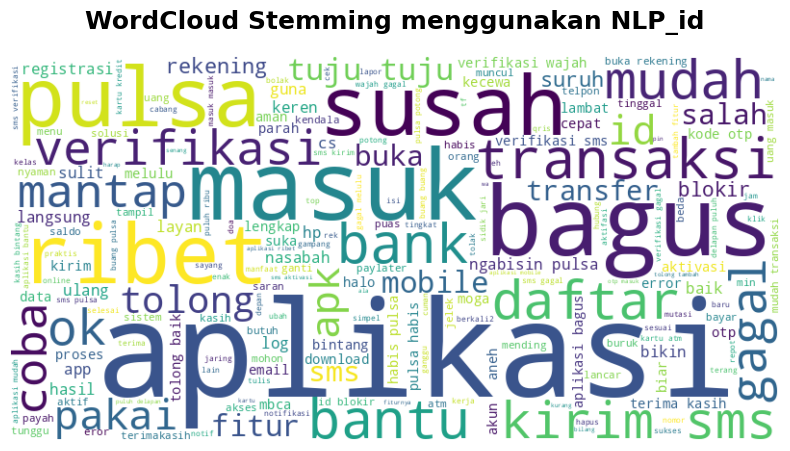

In [33]:
# @title wordclouds Stemming menggunakan NLP_id
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


text = ' '.join(df_reviews_all_proses['content_proses_stemming_nlp_id'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))

# Menampilkan word cloud dengan interpolasi gambar bilinear
plt.title("WordCloud Stemming menggunakan NLP_id", fontsize=18, fontweight='bold', pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

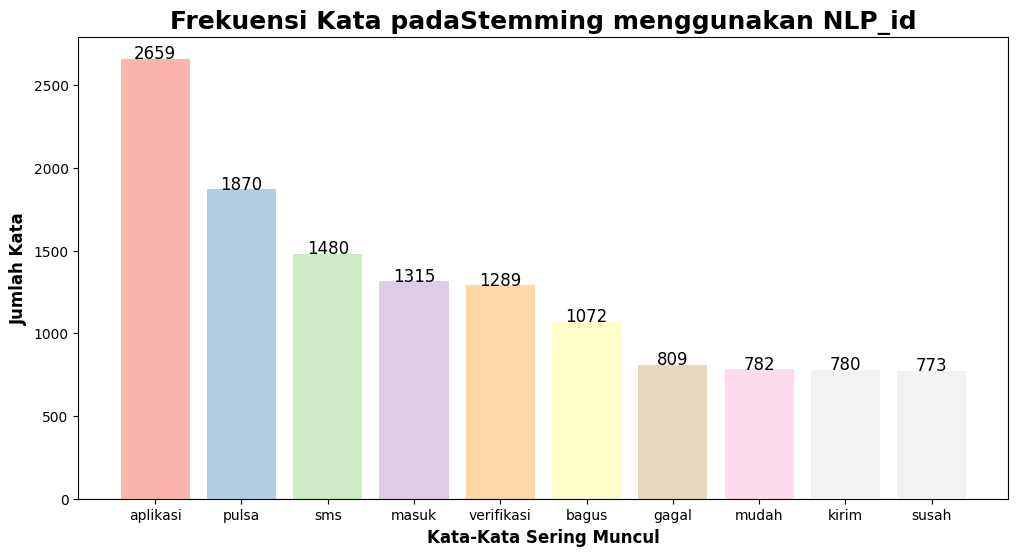

In [34]:
# @title Frekuensi Kata pada Stemming menggunakan NLP ID
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df_reviews_all_proses['content_proses_stemming_nlp_id'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna dengan warna yang lebih lembut
colors = plt.cm.Pastel1(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata padaStemming menggunakan NLP_id", fontsize=18, fontweight='bold')
plt.xticks(rotation=0)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 0.3, str(num), fontsize=12, color='black', ha='center')

plt.show()

## Feature Engineering

In [35]:
df_reviews_all_proses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11734 entries, 0 to 11733
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   reviewId                        11734 non-null  object
 1   score                           11734 non-null  int64 
 2   content                         11734 non-null  object
 3   content_cleaning                11734 non-null  object
 4   content_cleaning_normalized     11734 non-null  object
 5   content_tokenizing              11734 non-null  object
 6   content_part_of_speech          11734 non-null  object
 7   content_proses_stemming_nlp_id  11734 non-null  object
dtypes: int64(1), object(7)
memory usage: 733.5+ KB


In [36]:
df_reviews_all_proses.shape

(11734, 8)

### Labelling (Sentiment Score)

In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib
import requests

# Unduh VADER lexicon dari nltk
nltk.download('vader_lexicon')

# Membuat instance SentimentIntensityAnalyzer dan membersihkan leksikon default
sia1A, sia1B, sia2 = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()
sia1A.lexicon.clear()
sia1B.lexicon.clear()
sia2.lexicon.clear()

# URL leksikon InSet dan SentiWords
inset_neg_url = 'https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/inset/_json_inset-neg.txt'
inset_pos_url = 'https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/inset/_json_inset-pos.txt'
sentiwords_id_url = 'https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/sentistrength_id/_json_sentiwords_id.txt'

# Fungsi untuk mengunduh data dari URL
def download_lexicon(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad status codes
    return response.text

# Mendapatkan data dari URL
data1A = download_lexicon(inset_neg_url)
data1B = download_lexicon(inset_pos_url)
data2 = download_lexicon(sentiwords_id_url)

# Mengubah leksikon menjadi dictionary
insetNeg = json.loads(data1A)
insetPos = json.loads(data1B)
senti = json.loads(data2)

# Memperbarui leksikon VADER yang sudah 'dimodifikasi'
sia1A.lexicon.update(insetNeg)
sia1B.lexicon.update(insetPos)
sia2.lexicon.update(senti)

# Menampilkan sebagian dari leksikon yang diperbarui
print(reprlib.repr(sia1A.lexicon))
print(reprlib.repr(sia1B.lexicon))
print(reprlib.repr(sia2.lexicon))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'(barang) bekas': -4, '(olahraga) bokser': -5, '(tua) uzur': -3, 'Anda': -4, ...}
{'(hujan) gerimis': 1, '(warna) dadu': 3, 'Ahad': 3, 'Sri paduka': 4, ...}
{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


In [38]:
def classify_sentiment(text, sia):
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score > 0:
        return 'positif'
    elif compound_score < 0:
        return 'negatif'
    else:
        return 'netral'

# Terapkan fungsi pada kolom DataFrame menggunakan leksikon yang diperbarui
df_reviews_all_proses['sentiment'] = df_reviews_all_proses['content_proses_stemming_nlp_id'].apply(lambda x: classify_sentiment(x, sia2))

# Tampilkan DataFrame dengan kolom sentimen
df_reviews_all_proses.head(5)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech,content_proses_stemming_nlp_id,sentiment
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok,[ok],"[(ok, NN)]",ok,positif
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok,[ok],"[(ok, NN)]",ok,positif
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit,"[praktis, komplit]","[(praktis, JJ), (komplit, JJ)]",praktis komplit,netral
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan,"[bagus, dach, tahapan]","[(bagus, JJ), (dach, NN), (tahapan, NN)]",bagus dach tahap,positif
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir,"[keren, alternatif, mbca, keblokir]","[(keren, JJ), (alternatif, NN), (mbca, NN), (k...",keren alternatif mbca blokir,netral


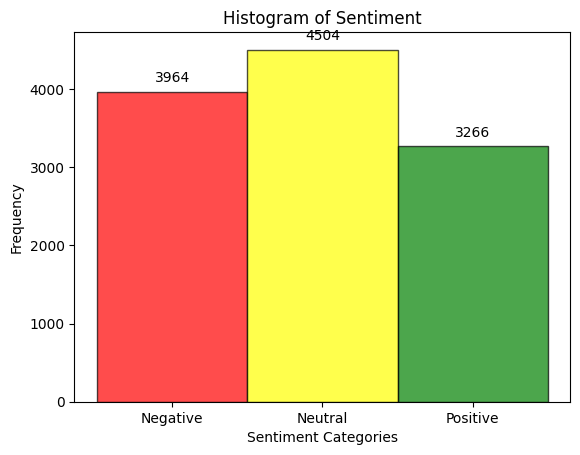

In [39]:
import matplotlib.pyplot as plt

# Extract the sentiment column
sentiment = df_reviews_all_proses['sentiment']

# Create a histogram with 3 bins
counts, bins, patches = plt.hist(sentiment, bins=3, edgecolor='black', alpha=0.7)

# Define bin labels and colors
bin_labels = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'yellow', 'green']

# Add labels and title
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment')

# Set x-axis tick labels at the center of each bin
plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], bin_labels)

# Color each bin separately
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Annotate the counts on the histogram
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Show the plot
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_reviews_all_proses['sentiment_numeric'] = label_encoder.fit_transform(df_reviews_all_proses['sentiment'])

df_reviews_all_proses.head()


,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech,content_proses_stemming_nlp_id,sentiment,sentiment_numeric
0,d0a6cd1f-3977-4b32-874a-b9e9bb6adb67,5,Ok,ok,ok,[ok],"[(ok, NN)]",ok,positif,2
1,819dc85e-2820-43d5-ad11-10c1fd67098c,5,Ok,ok,ok,[ok],"[(ok, NN)]",ok,positif,2
2,32de9434-9257-46da-b319-610f03ed3bac,5,Praktis dan komplit,praktis dan komplit,praktis komplit,"[praktis, komplit]","[(praktis, JJ), (komplit, JJ)]",praktis komplit,netral,1
3,e8fa71c0-8eb7-4583-99e9-b4c0dfb84f55,5,Bagus dach tahapan,bagus dach tahapan,bagus dach tahapan,"[bagus, dach, tahapan]","[(bagus, JJ), (dach, NN), (tahapan, NN)]",bagus dach tahap,positif,2
4,5bd780b7-5fae-4cf1-911a-893e93b58b5c,5,Keren!! Alternatif saat mbca keblokir :),keren alternatif saat mbca keblokir,keren alternatif mbca keblokir,"[keren, alternatif, mbca, keblokir]","[(keren, JJ), (alternatif, NN), (mbca, NN), (k...",keren alternatif mbca blokir,netral,1


### pembobotan kata : TF IDF

In [41]:
from sklearn.model_selection import train_test_split
# @title membagi data latih dan data test
documents = df_reviews_all_proses['content_proses_stemming_nlp_id']
labels = df_reviews_all_proses['sentiment_numeric']
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

In [42]:
# @title TF IDF
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming df_reviews_all_proses is already defined and contains the column 'content_proses_stemming_nlp_id'
documents = df_reviews_all_proses['content_proses_stemming_nlp_id']

# Define the maximum number of features
max_features = 1000  # Adjust this as needed

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, binary=True)

# Fit and transform training documents into TF-IDF matrix
X_train_tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

# Transform testing documents into TF-IDF matrix
X_test_tfidf_matrix = tfidf_vectorizer.transform(X_test)


# Convert TF-IDF train matrix to DataFrame
df_tfidf_train = pd.DataFrame(X_train_tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Convert TF-IDF testing matrix to DataFrame
df_tfidf_test  = pd.DataFrame(X_train_tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

           term        rank
97        bagus  396.358286
75     aplikasi  377.881694
635          ok  296.211172
718       pulsa  284.236412
109       bantu  230.194141
843         sms  224.499489
538      mantap  217.730787
546       masuk  217.601351
980  verifikasi  212.364292
588       mudah  200.079907


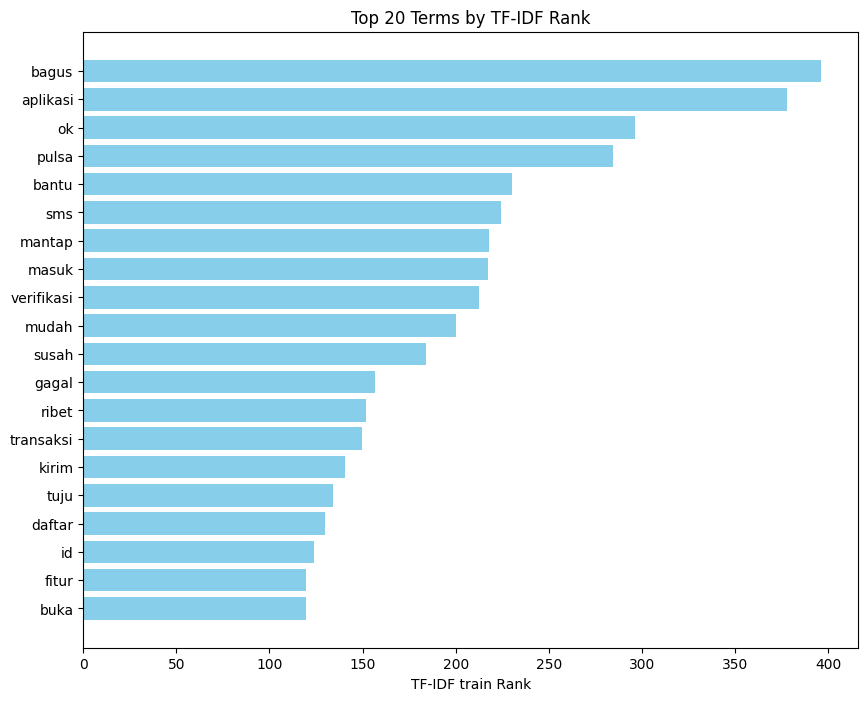

In [43]:
# @title tf idf data latih
# Display the DataFrame TF-IDF
terms = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF frequency of each term through documents
sums = X_train_tfidf_matrix.sum(axis=0)

# Connecting term to its sums frequency
data_tfidf = []
for col, term in enumerate(terms):
    data_tfidf.append((term, sums[0, col]))

# Create a DataFrame with terms and their corresponding ranks
ranking = pd.DataFrame(data_tfidf, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

# Display the ranking DataFrame
print(ranking.head(10))

# Plot the top 20 terms by TF-IDF rank
plt.figure(figsize=(10, 8))
top_terms = ranking.head(20)
plt.barh(top_terms['term'], top_terms['rank'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('TF-IDF train Rank')
plt.title('Top 20 Terms by TF-IDF Rank')
plt.show()


           term        rank
75     aplikasi  171.543402
97        bagus  140.379889
635          ok  127.099452
538      mantap  118.807718
109       bantu  117.082950
718       pulsa  111.203446
588       mudah   99.117305
546       masuk   90.439304
980  verifikasi   89.162023
843         sms   88.801002


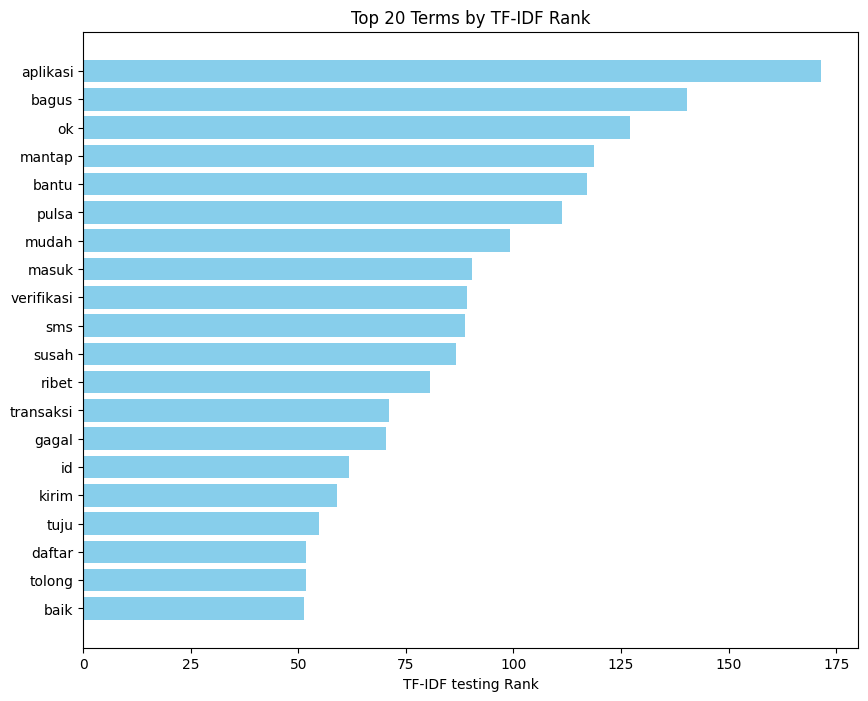

In [44]:
# @title tf idf data testing
# Display the DataFrame TF-IDF
terms = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF frequency of each term through documents
sums = X_test_tfidf_matrix.sum(axis=0)

# Connecting term to its sums frequency
data_tfidf = []
for col, term in enumerate(terms):
    data_tfidf.append((term, sums[0, col]))

# Create a DataFrame with terms and their corresponding ranks
ranking = pd.DataFrame(data_tfidf, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

# Display the ranking DataFrame
print(ranking.head(10))

# Plot the top 20 terms by TF-IDF rank
plt.figure(figsize=(10, 8))
top_terms = ranking.head(20)
plt.barh(top_terms['term'], top_terms['rank'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('TF-IDF testing Rank')
plt.title('Top 20 Terms by TF-IDF Rank')
plt.show()

In [45]:

from imblearn.over_sampling import SMOTE
#@title imbalanced SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf_matrix, y_train)


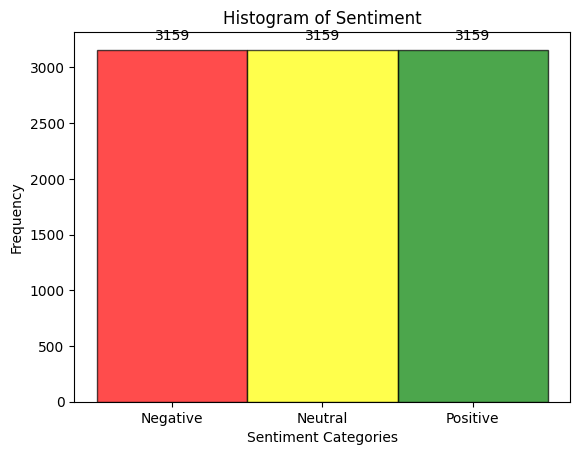

In [46]:
import matplotlib.pyplot as plt


# Create a histogram with 3 bins
counts, bins, patches = plt.hist(y_resampled, bins=3, edgecolor='black', alpha=0.7)

# Define bin labels and colors
bin_labels = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'yellow', 'green']

# Add labels and title
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment')

# Set x-axis tick labels at the center of each bin
plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], bin_labels)

# Color each bin separately
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Annotate the counts on the histogram
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Show the plot
plt.show()


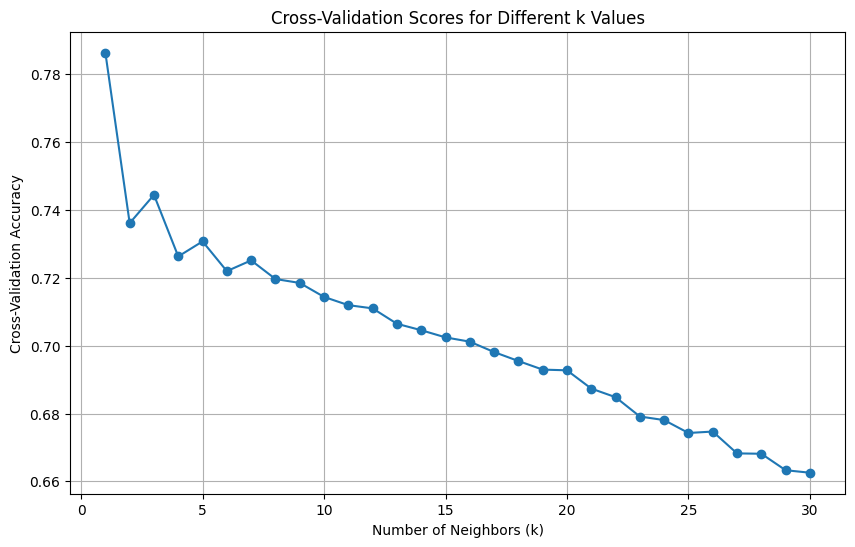

The optimal number of neighbors is 1 with a cross-validation accuracy of 0.79


In [47]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
#@title Determine the optimal number of neighbors using cross-validation and the elbow method
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the cross-validation scores to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Cross-Validation Scores for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find the optimal k (elbow point)
optimal_k = k_range[np.argmax(k_scores)]
print(f"The optimal number of neighbors is {optimal_k} with a cross-validation accuracy of {max(k_scores):.2f}")


# Modeling


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
# Initialize the KNN classifier with k=3 (you can adjust k as needed)
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the KNN model
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=1)

In [50]:
# Make predictions on the test data
y_pred = knn.predict(X_test_tfidf_matrix)

# Evaluasi

Accuracy: 0.74
Confusion Matrix:
[[ 830  139   14]
 [ 259 1026   60]
 [ 299  156  738]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       983
           1       0.78      0.76      0.77      1345
           2       0.91      0.62      0.74      1193

    accuracy                           0.74      3521
   macro avg       0.76      0.74      0.74      3521
weighted avg       0.77      0.74      0.74      3521



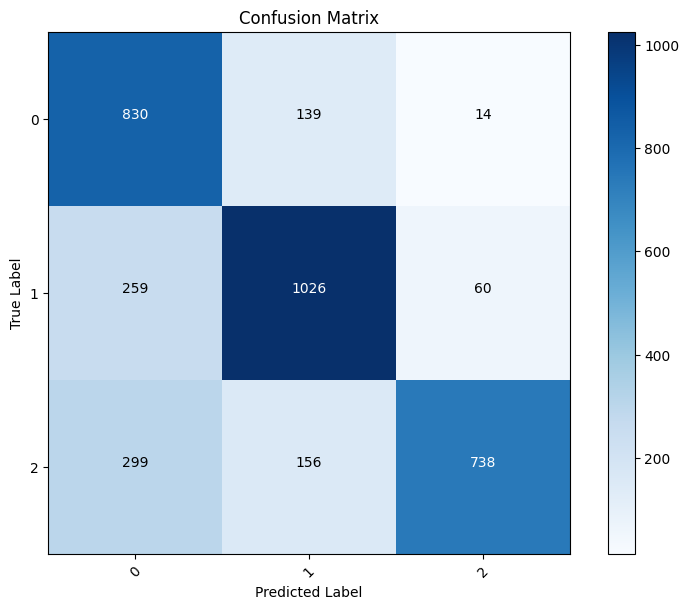

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Assuming y_test, y_pred, labels are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Plot the confusion matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))

# Annotate the matrix
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [52]:
# Create a DataFrame with the predictions
df_predictions = pd.DataFrame({
    'Original Text': X_test,
    'True Label': y_test,
    'Predicted Label': y_pred
})

df_predictions

,Original Text,True Label,Predicted Label
2585,donwload teus hapus donwload masuk transaksima...,1,1
6030,aplikasi kirim sms kali aneh pesan kali abis p...,0,1
5003,kasih bintang dulukenapa aju payleter tolakter...,1,1
3431,buang2 pulsa,1,1
3562,aplikasi sampah bikin id kirim sms ulang rsesp...,0,0
...,...,...,...
5692,registrasi sedot pulsa berkali2,1,1
3989,payah paylater tolak bintang kelas puluh enam ...,0,0
5861,mantaf,1,1
7384,bayar pln hadehhhhhh minim fitur tolong alih,0,1
